In [8]:
# Calculating currents in each ring on fft way
import numpy as np
from Fast_Method import solvesystem
from Geometry import Rectangle_packing
from Impedance_matrix import M_0
from Verifying_MRI.Parameters_MRI import Dz, Dy, Dx, Radius, omega_0, Params

import json

Inductance = {}
Omega =  np.linspace(0.95 * omega_0, 1.15 * omega_0, 100)
H_0z = 1
mu_0 = 4 * np.pi * 1e-7
# Calculate polarisation for different structures

Shapes = {
    'Stick': {
        'z': {'nx': 6, 'ny': 6, 'nz': 25},
        'y': {'nx': 6, 'ny': 5, 'nz': 24},
        'x': {'nx': 5, 'ny': 6, 'nz': 24}
        },
    'Flat': {
        'z': {'nx': 16, 'ny': 16, 'nz': 5},
        'y': {'nx': 16, 'ny': 15, 'nz': 4},
        'x': {'nx': 15, 'ny': 16, 'nz': 4}
        },
    'Cube':{
        'z': {'nx': 10, 'ny': 10, 'nz': 11},
        'y': {'nx': 10, 'ny': 9, 'nz': 10},
        'x': {'nx': 9, 'ny': 10, 'nz': 10}
        }
    }
Dz, Dy, Dx = Params['Dz'], Params['Dy'], Params['Dx']
# Initial position of the first ring for each orientation
R0 = {
    'z': {'nx': Dx/2, 'ny': Dy/2, 'nz': 0},
    'y': {'nx': Dx, 'ny': Dy/2, 'nz': Dz/2},
    'x': {'nx': Dz/2, 'ny': Dy, 'nz': Dz/2}
}

for name in Shapes:
    Params['N'] = Shapes[name]
    # make 3d structure
    print(f'Make rings: {name}, {Params["N"]}')
    Rings_4d ={}
    for pos in Params['N']:
        Rings_4d[pos] = Rectangle_packing(Params, r0 = R0[pos], orientation=pos).reshape(
                                                     Params['N'][pos]['nz'],
                                                     Params['N'][pos]['ny'],
                                                     Params['N'][pos]['nx'])

    Currents = solvesystem(Rings_4d, M_0(Params), Omega, phi_0z=H_0z * mu_0, Inductance = Inductance, tol = 1e-2)

    Nz, Ny, Nx = [Params['N'][pos][f'n{pos}'] for pos in Params['N']]
    Volume =  Nx * Ny * Nz * Dz * Dy * Dx
    P_0z = np.pi * Radius ** 2 * Volume/mu_0/H_0z
    Currents['RealPolarisation'] = [P_0z * sum(i) for i in Currents['RealCurrents']]
    Currents['ImagPolarisation'] = [P_0z * sum(i) for i in Currents['ImagCurrents']]
    dims = ''.join([pos for pos in Params['N']])
    with open(f"Data/Form_Data/anizotropic/{name}/Currents-{dims}-{Nz}x{Ny}x{Nx}", "w") as f:
        json.dump(Currents, f)

    exclude = ['RealCurrents', 'ImagCurrents']
    data = {key: value for key, value in Currents.items() if key not in exclude}
    with open(f"Data/Form_Data/anizotropic/{name}/Data-{dims}-{Nz}x{Ny}x{Nx}", "w") as f:
        json.dump(data, f)


circvecs:Done


100%|██████████| 100/100 [00:03<00:00, 32.46it/s]


FFT solving: Done, shape = [('z', (25, 6, 6)), ('y', (24, 5, 6)), ('x', (24, 6, 5))]
circvecs:Done


100%|██████████| 100/100 [00:04<00:00, 23.78it/s]


FFT solving: Done, shape = [('z', (5, 16, 16)), ('y', (4, 15, 16)), ('x', (4, 16, 15))]
circvecs:Done


100%|██████████| 100/100 [00:04<00:00, 20.81it/s]


FFT solving: Done, shape = [('z', (11, 10, 10)), ('y', (10, 9, 10)), ('x', (10, 10, 9))]


In [3]:
# Calculating currents in each ring on straight way

import numpy as np
from Straight_Method import solvesystem
from Geometry import Rectangle_packing
from Impedance_matrix import M_0
from Verifying_MRI.Parameters_MRI import Dz, Dy, Dx, Radius, omega_0, Params

import json

Inductance = {}
Omega =  np.linspace(0.95 * omega_0, 1.15 * omega_0, 1000)
H_0z = 1
mu_0 = 4 * np.pi * 1e-7
# Calculate polarisation for different structures

Shapes = {
    'Stick': {
        'z': {'nx': 6, 'ny': 6, 'nz': 25},
        'y': {'nx': 6, 'ny': 5, 'nz': 24},
        'x': {'nx': 5, 'ny': 6, 'nz': 24}
        },
    'Flat': {
        'z': {'nx': 16, 'ny': 16, 'nz': 5},
        'y': {'nx': 16, 'ny': 15, 'nz': 4},
        'x': {'nx': 15, 'ny': 16, 'nz': 4}
        },
    'Cube':{
        'z': {'nx': 10, 'ny': 10, 'nz': 11},
        'y': {'nx': 10, 'ny': 9, 'nz': 10},
        'x': {'nx': 9, 'ny': 10, 'nz': 10}
        }
    }
Dz, Dy, Dx = Params['Dz'], Params['Dy'], Params['Dx']
# Initial position of the first ring for each orientation
R0 = {
    'z': {'nx': Dx/2, 'ny': Dy/2, 'nz': 0},
    'y': {'nx': Dx, 'ny': Dy/2, 'nz': Dz/2},
    'x': {'nx': Dz/2, 'ny': Dy, 'nz': Dz/2}
}

for name in Shapes:
    Params['N'] = Shapes[name]
    # make 3d structure
    print(f'Make Rings: {name}, {Params["N"]}')
    Rings_4d ={}
    for pos in Params['N']:
        Rings_4d[pos] = Rectangle_packing(Params, r0 = R0[pos], orientation=pos)
    Rings = np.concatenate([Rings_4d[pos] for pos in Params['N']])
    Currents = solvesystem(Rings, M_0(Params), Omega, phi_0z=H_0z * mu_0, Inductance = Inductance)

    Nz, Ny, Nx = [Params['N'][pos][f'n{pos}'] for pos in Params['N']]
    Volume =  Nx * Ny * Nz * Dz * Dy * Dx
    P_0z = np.pi * Radius ** 2 * Volume/mu_0/H_0z
    Currents['RealPolarisation'] = [P_0z * sum(i) for i in Currents['RealCurrents']]
    Currents['ImagPolarisation'] = [P_0z * sum(i) for i in Currents['ImagCurrents']]
    
    dims = ''.join([pos for pos in Params['N']])
    with open(f"Data/Form_Data/anizotropic/{name}/Currents-{dims}-{Nz}x{Ny}x{Nx}", "w") as f:
        json.dump(Currents, f)

    exclude = ['RealCurrents', 'ImagCurrents']
    data = {key: value for key, value in Currents.items() if key not in exclude}
    with open(f"Data/Form_Data/anizotropic/{name}/Data-{dims}-{Nz}x{Ny}x{Nx}", "w") as f:
        json.dump(data, f)

Make Rings: Stick, {'z': {'nx': 6, 'ny': 6, 'nz': 25}, 'y': {'nx': 6, 'ny': 5, 'nz': 24}, 'x': {'nx': 5, 'ny': 6, 'nz': 24}}
Matrix forming


100%|██████████| 2340/2340 [01:37<00:00, 23.97it/s]


Matrix: Done
Straight solving


100%|██████████| 1000/1000 [06:51<00:00,  2.43it/s]


Straight solving: Done
Make Rings: Flat, {'z': {'nx': 16, 'ny': 16, 'nz': 5}, 'y': {'nx': 16, 'ny': 15, 'nz': 4}, 'x': {'nx': 15, 'ny': 16, 'nz': 4}}
Matrix forming


 41%|████      | 1300/3200 [01:02<05:31,  5.73it/s]/Users/shuramakarenko/LocalDocs/Discrete_Model_Of_Metamaterial_Lens/Code/Impedance_matrix.py:62: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  L_1, err_1 = integrate.quad(dl, 0, 2 * pi, args=(dx, dy, dz, r, r))
/Users/shuramakarenko/LocalDocs/Discrete_Model_Of_Metamaterial_Lens/Code/Impedance_matrix.py:64: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of

Matrix: Done
Straight solving


  0%|          | 0/1000 [00:00<?, ?it/s]


ValueError: array must not contain infs or NaNs

<Figure size 1000x500 with 0 Axes>

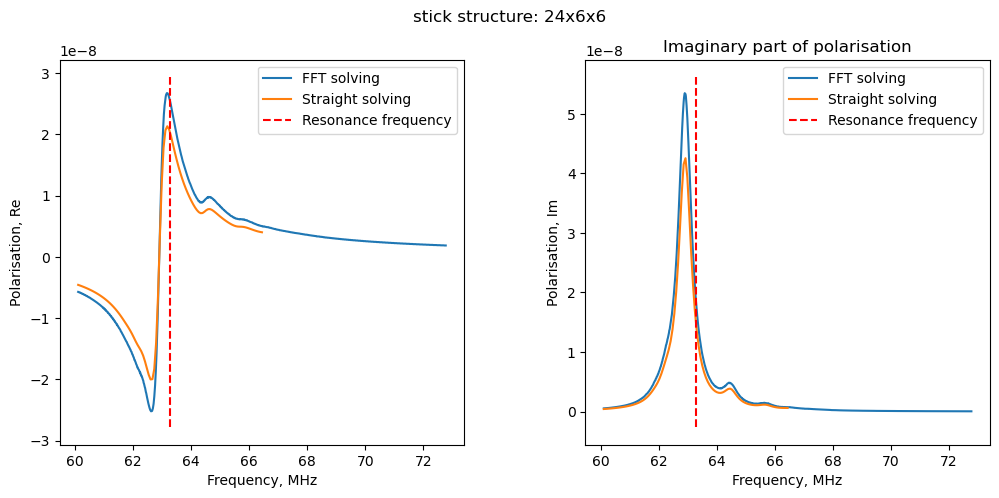

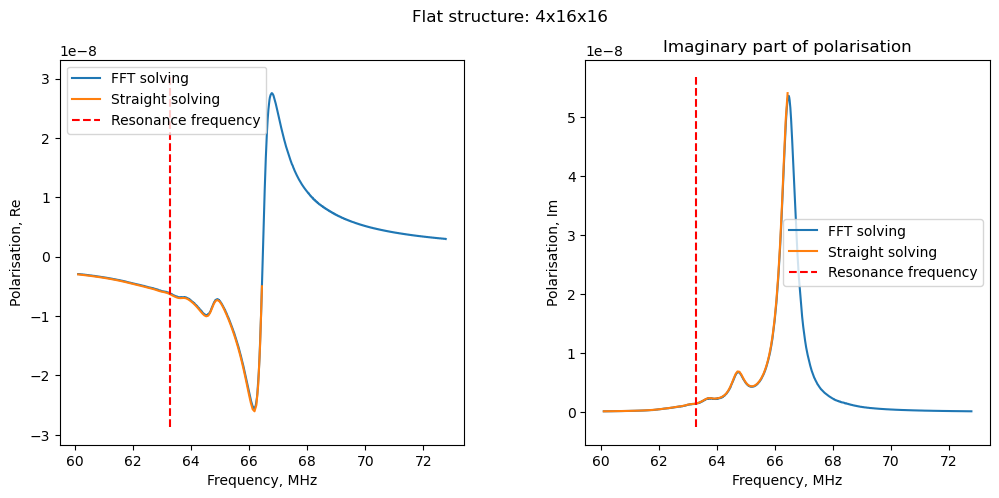

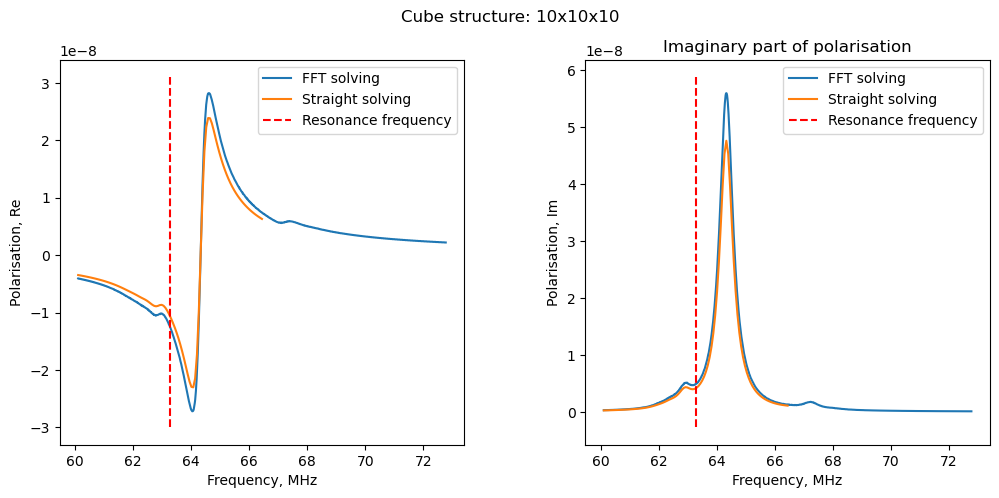

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

types = ["stick", "Flat", "Cube"]
Ns = [{"x": 6, "y": 6, "z": 24}, {"x": 16, "y": 16, "z": 4}, {"x": 10, "y": 10, "z": 10}]
mu_0 = 4 * np.pi * 10**-7

for type, N in zip(types, Ns):
    with open(f"Data/Form_Data/anizotropic/{type}/Data{N['z']}x{N['y']}x{N['x']}", "r") as f:
        Data = json.load(f)
    Omega = np.array(Data["Omega"])
    plt.figure(figsize=(12, 5))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)  
    plt.suptitle(f"{type} structure: {N['z']}x{N['y']}x{N['x']}")
    plt.subplot(121)
    

    plt.plot(Omega/2/np.pi/10**6, Data["RealPolarisation"], label = 'FFT solving')
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Re")

    plt.subplot(122)
    plt.plot(Omega/2/np.pi/10**6, Data["ImagPolarisation"], label = 'FFT solving')
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Im")

    with open(f"Data/Form_Data/anizotropic/{type}/S-Data{N['z']}x{N['y']}x{N['x']}", "r") as f:
        Data = json.load(f)
    
    Data['RealPolarisation'] = np.array(Data['RealPolarisation'])
    Data['ImagPolarisation'] = np.array(Data['ImagPolarisation'])
    Omega = np.array(Data["Omega"])

    plt.subplot(121) 

    plt.plot(Omega/2/np.pi/10**6, Data["RealPolarisation"], label = 'Straight solving')
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Re")

    plt.subplot(122)
    plt.title("Imaginary part of polarisation")
    plt.plot(Omega/2/np.pi/10**6, Data["ImagPolarisation"], label = 'Straight solving')
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Im")

    plt.subplot(121)
    ylim = plt.ylim()
    plt.vlines(omega_0/2/np.pi/10**6, ylim[0], ylim[1], color="red", linestyle="--", label='Resonance frequency')
    plt.legend()

    plt.subplot(122)
    ylim = plt.ylim()
    plt.vlines(omega_0/2/np.pi/10**6, ylim[0], ylim[1], color="red", linestyle="--", label='Resonance frequency')
    plt.legend()
    plt.show()

In [ ]:
# Drawing GIFs
from PIL import Image
import numpy as np
from numpy import sqrt
Grads = {
    'Zero': [[0, 0, 0]],
    'Z': [[0, 0, 0.01],
        [0, 0, 0.03],
        [0, 0, 0.1],
        [0, 0, 0.3]],
    'X': [[0.01, 0, 0],
        [0.03, 0, 0],
        [0.1, 0, 0],
        [0.3, 0, 0]],
}
Omega =  np.linspace(0.9 * omega_0, 1.4*omega_0, 500)
for type in Grads:
    for orientation in ['ZX', 'YZ', 'XY']:
        for grad in Grads[type]:
            frames = []
            for omega in Omega:
                frame = Image.open(f'/Users/shuramakarenko/Discrete_Model_Of_Metamaterial_Lens/Code/Plots/{type}-grad = {max(grad)}/{orientation}3-f={round(omega/2/np.pi/10 ** 6, 2)}MHz.png')
                frames.append(frame)
            frames[0].save(f'/Users/shuramakarenko/Discrete_Model_Of_Metamaterial_Lens/Code/Plots/GIFS/CD-{orientation}-20x20x20Rings3 grad{type} ={max(grad)}.gif',
                           save_all = True,
                           append_images = frames[1:], 
                           optimize = True, 
                           duration = 150, 
                           loop = 1)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/shuramakarenko/Discrete_Model_Of_Metamaterial_Lens/Code/Plots/Zero-grad = 0/ZX3-f=56.95MHz.png'

In [ ]:
# Work with Data and calculate polarisation
import matplotlib.pyplot as plt
import json
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

Polarisation = {}
MaxCurrents = {}
MinCurrents = {}
FullGradPolarisation = {}
FullGradMaxCurrents = {}
FullGradMinCurrents = {}



Grads = {
    'Zero': [[0, 0, 0]],
    'Z': [[0, 0, 0.01],
        [0, 0, 0.03],
        [0, 0, 0.1],
        [0, 0, 0.3]],
    'X': [[0.01, 0, 0],
        [0.03, 0, 0],
        [0.1, 0, 0],
        [0.3, 0, 0]],
}
for type in Grads:
    for grad in Grads[type]:
        with open(f"DATA/Data{type}{max(grad)}-n=20.json", "r") as res:
            Data = json.loads(res.read())
        

        N = Data['N']
        Omega = np.array(Data['Omega'])
        a, a1, b, b1, c, c1, w, L, C, R = Data['params']
        M = np.array(Data['Matrix'])
        Number = len(M)
        Currents = np.array(Data['RealCurrents'], dtype = complex) + 1j * np.array(Data['ImagCurrents'], dtype = complex)
        BorderCurrents = np.array(Data['BorderCurrentReal'], dtype = complex) + 1j * np.array(Data['BorderCurrentImag'], dtype = complex)
        if max(grad) != 0:
            Polarisation[f'{type}{grad}'] = Data['RealPolarisation'] + 1j * np.array(Data['ImagPolarisation'], dtype = complex)
            MaxCurrents[f'{type}{grad}'] = Data['RealMaxCurrents'] + 1j * np.array(Data['ImagMaxCurrents'], dtype = complex)
            MinCurrents[f'{type}{grad}'] = Data['RealMinCurrents'] + 1j * np.array(Data['ImagMinCurrents'], dtype = complex)
        if max(grad) == max([max(grad2) for grad2 in Grads[type]]):
            FullGradPolarisation[max(grad)] = Data['BorderRealPolarisation'] + 1j * np.array(Data['BorderImagPolarisation'], dtype = complex)
            FullGradMaxCurrents[max(grad)] = Data['BorderRealMaxCurrents'] + 1j * np.array(Data['BorderImagMaxCurrents'], dtype = complex)
            FullGradMinCurrents[max(grad)] = Data['BorderRealMinCurrents'] + 1j * np.array(Data['BorderImagMinCurrents'], dtype = complex)
        if max(grad) == 0:
            FullGradPolarisation[0] = Data['RealPolarisation'] + 1j * np.array(Data['ImagPolarisation'], dtype = complex)
            FullGradMaxCurrents[0] = Data['RealMaxCurrents'] + 1j * np.array(Data['ImagMaxCurrents'], dtype = complex)
            FullGradMinCurrents[0] = Data['RealMinCurrents'] + 1j * np.array(Data['ImagMinCurrents'], dtype = complex)
        print(f'Data: got {type}-grad = {grad}')

        
        Currents3D = Currents.reshape((len(Omega), N['z'], N['y'], N['z']))
        MaxMiddleXZCurrents = np.real(Currents3D[:, :, N['y']//2, :]).max()
        MinMiddleXZCurrents = np.real(Currents3D[:, :, N['y']//2, :]).min()
        MaxMiddleYZCurrents = np.real(Currents3D[:, :, :, N['x']//2]).max()
        MinMiddleYZCurrents = np.real(Currents3D[:, :, :, N['x']//2]).min()
        MaxMiddleXYCurrents = np.real(Currents3D[:, N['z']//2, :, :]).max()
        MinMiddleXYCurrents = np.real(Currents3D[:, N['z']//2, :, :]).min()

        for I, omega in zip(Currents3D, Omega):
            
            X = list(range(N['x']))
            Y = list(range(N['y']))
            Z = list(range(N['z']))
            fig, ax = plt.subplots()
            fig.set_size_inches((10, 5))
            CurrentsXZ = I[:,N['y']//2,:]
            LinesXZ = plt.contour(X, Z, CurrentsXZ, 6, colors = 'black')
            Imax, Imin = CurrentsXZ.max(), CurrentsXZ.min()
            DeltaCurrents = np.real(Imax) - np.real(Imin)
            MaxDeltaCurrents = MaxMiddleXZCurrents - MinMiddleXZCurrents
            amplitude = DeltaCurrents/MaxDeltaCurrents
            middlepos = (Imin-MinMiddleXZCurrents)/(MaxDeltaCurrents - DeltaCurrents)
            ticksnumber = round(amplitude * 10) + 1
            ticks = list(map(lambda x: round(np.real(x), 2), np.linspace(Imax, Imin, ticksnumber)))

            plt.xlabel(r'$n_x$', fontsize = 15)
            plt.ylabel(r'$n_z$', fontsize = 15)
            plt.title(f"$f =${round(omega/2/pi/10 ** 6, 2)},MHz", fontsize = 15)

            plt.contourf(X, Z, CurrentsXZ, 100, cmap=plt.cm.hot)
            plt.clabel(LinesXZ, inline=1, fontsize=15)
            plt.colorbar(label = 'Current', fraction = 0.09, pad = 0.25, 
                         shrink = 10, aspect = amplitude/0.09, anchor = (middlepos, 0),
                         ticks = ticks, orientation = 'horizontal'
                         ).ax.tick_params(rotation = 45)
            plt.savefig(f'/Users/shuramakarenko/Discrete_Model_Of_Metamaterial_Lens/Code/Plots/{type}-grad = {max(grad)}/ZX3-f={round(omega/2/pi/10 ** 6, 2)}MHz.png')
            
            # X = list(range(N['x']))
            # Y = list(range(N['y']))
            # Z = list(range(N['z']))
            # fig, ax = plt.subplots()
            # fig.set_size_inches((10, 5))
            # CurrentsYZ = I[:,:,N['x']//2]
            # LinesYZ = plt.contour(X, Z, CurrentsYZ, 6, colors = 'black')
            # Imax, Imin = CurrentsYZ.max(), CurrentsYZ.min()
            # DeltaCurrents = np.real(Imax) - np.real(Imin)
            # MaxDeltaCurrents = MaxMiddleYZCurrents - MinMiddleYZCurrents
            # amplitude = DeltaCurrents/MaxDeltaCurrents
            # middlepos = (Imin-MinMiddleYZCurrents)/(MaxDeltaCurrents - DeltaCurrents)
            # ticksnumber = round(amplitude * 10) + 1
            # ticks = list(map(lambda x: round(np.real(x), 2), np.linspace(Imax, Imin, ticksnumber)))

            # plt.xlabel(r'$n_y$', fontsize = 15)
            # plt.ylabel(r'$n_z$', fontsize = 15)
            # plt.title(f"$f =${round(omega/2/pi/10 ** 6, 2)},MHz", fontsize = 15)

            # plt.contourf(Y, Z, CurrentsYZ, 100, cmap=plt.cm.hot)
            # plt.clabel(LinesYZ, inline=1, fontsize=15)
            # plt.colorbar(label = 'Current', fraction = 0.09, pad = 0.25, 
            #              shrink = 10, aspect = amplitude/0.09, anchor = (middlepos, 0),
            #              ticks = ticks, orientation = 'horizontal'
            #              ).ax.tick_params(rotation = 45)
            # plt.savefig(f'/Users/shuramakarenko/Discrete_Model_Of_Metamaterial_Lens/Code/Plots/{type}-grad = {max(grad)}/YZ3-f={round(omega/2/pi/10 ** 6, 2)}MHz.png')

            # X = list(range(N['x']))
            # Y = list(range(N['y']))
            # Z = list(range(N['z']))
            # fig, ax = plt.subplots()
            # fig.set_size_inches((7, 7))
            # CurrentsXY = I[N['z']//2, :, :]
            # LinesXY = plt.contour(X, Z, CurrentsXY, 6, colors = 'black')
            # Imax, Imin = CurrentsXY.max(), CurrentsXY.min()
            # DeltaCurrents = np.real(Imax) - np.real(Imin)
            # MaxDeltaCurrents = MaxMiddleXYCurrents - MinMiddleXYCurrents
            # amplitude = DeltaCurrents/MaxDeltaCurrents
            # middlepos = (Imin-MinMiddleXYCurrents)/(MaxDeltaCurrents - DeltaCurrents)
            # ticksnumber = round(amplitude * 10) + 1
            # ticks = list(map(lambda x: round(np.real(x), 2), np.linspace(Imax, Imin, ticksnumber)))

            # plt.xlabel(r'$n_x$', fontsize = 15)
            # plt.ylabel(r'$n_y$', fontsize = 15)
            # plt.title(f"$f =${round(omega/2/pi/10 ** 6, 2)},MHz", fontsize = 15)

            # plt.contourf(X, Y, CurrentsXY, 100, cmap=plt.cm.hot)
            # plt.clabel(LinesXY, inline=1, fontsize=15)
            # plt.colorbar(label = 'Current', fraction = 0.03, pad = 0.05, 
            #              shrink = 10, aspect = amplitude/0.03, anchor = (0, middlepos),
            #              ticks = ticks
            #              )
            # plt.savefig(f'/Users/shuramakarenko/Discrete_Model_Of_Metamaterial_Lens/Code/Plots/{type}-grad = {max(grad)}/XY3-f={round(omega/2/pi/10 ** 6, 2)}MHz.png')





In [ ]:
# Polarisation plots
for i in Polarisation:
    print(i)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.xlabel(r'$f$, MHz')
plt.ylabel('Polarisation, imag')

plt.plot(Omega/2/np.pi/10**6, FullGradPolarisation[0], label = f'no grad', linestyle = '--')
plt.plot(Omega/2/np.pi/10**6, FullGradPolarisation[0.3], label = f'all 30% different', linestyle = '--')
plt.vlines(1/2/np.pi/10 ** 6 /sqrt(L *C), 0, max(FullGradPolarisation[0.3]), label = 'resonance frequence', linestyle = ':')
# plt.plot(Omega/2/pi/10**6, Polarisation[f'Z[0, 0, 0.1]'], label = f'z-grad = {int(0.1 * 100)}%')
# plt.ylim(0, 3)
# plt.xlim(65, 75)
for grad in Grads['Z']:
    plt.plot(Omega/2/pi/10**6, Polarisation[f'Z{grad}'], label = f'z-grad = {int(max(grad) * 100)}%')

plt.legend()
plt.show()


plt.figure(figsize=(12, 8))
plt.xlabel(r'$f$, MHz')
plt.ylabel('Polarisation, imag')

plt.plot(Omega/2/pi/10**6, FullGradPolarisation[0], label = f'no grad', linestyle = '--')
plt.plot(Omega/2/pi/10**6, FullGradPolarisation[0.3], label = f'all 30% different', linestyle = '--')
plt.vlines(1/2/pi/10 ** 6 /sqrt(L *C), 0, max(FullGradPolarisation[0.3]), label = 'resonance frequence', linestyle = ':')

for grad in Grads['X']:
    plt.plot(Omega/2/pi/10**6, Polarisation[f'X{grad}'], label = f'x-grad = {int(max(grad) * 100)}%')

plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
plt.xlabel(r'$f$, MHz')
plt.ylabel(r'$I_{max}$')

plt.plot(Omega/2/pi/10**6, FullGradMaxCurrents[0], label = f'no grad', linestyle = '--')
plt.plot(Omega/2/pi/10**6, FullGradMaxCurrents[0.3], label = f'all 30% different', linestyle = '--')
plt.vlines(1/2/pi/10 ** 6 /sqrt(L *C), min(FullGradMaxCurrents[0.3]), max(FullGradMaxCurrents[0.3]), label = 'resonance frequence', linestyle = ':')

for grad in Grads['Z']:
    plt.plot(Omega/2/pi/10**6, MaxCurrents[f'Z{grad}'], label = f'z-grad = {int(max(grad) * 100)}%')

plt.legend()
plt.show() 


plt.figure(figsize=(12, 8))
plt.xlabel(r'$f$, MHz')
plt.ylabel(r'$I_{min}$')

plt.plot(Omega/2/pi/10**6, FullGradMinCurrents[0], label = f'no grad', linestyle = '--')
plt.plot(Omega/2/pi/10**6, FullGradMinCurrents[0.3], label = f'all 30% different', linestyle = '--')
plt.vlines(1/2/pi/10 ** 6 /sqrt(L *C), min(FullGradMinCurrents[0.3]), max(FullGradMinCurrents[0.3]), label = 'resonance frequence', linestyle = ':')

for grad in Grads['Z']:
    plt.plot(Omega/2/pi/10**6, MinCurrents[f'Z{grad}'], label = f'z-grad = {int(max(grad) * 100)}%')

plt.legend()
plt.show() 


plt.figure(figsize=(12, 8))
plt.xlabel(r'$f$, MHz')
plt.ylabel(r'$I_{max}$')

plt.plot(Omega/2/pi/10**6, FullGradMaxCurrents[0], label = f'no grad', linestyle = '--')
plt.plot(Omega/2/pi/10**6, FullGradMaxCurrents[0.3], label = f'all 30% different', linestyle = '--')
plt.vlines(1/2/pi/10 ** 6 /sqrt(L *C), min(FullGradMaxCurrents[0.3]), max(FullGradMaxCurrents[0.3]), label = 'resonance frequence', linestyle = ':')
for grad in Grads['X']:
    plt.plot(Omega/2/pi/10**6, MaxCurrents[f'X{grad}'], label = f'x-grad = {int(max(grad) * 100)}%')

plt.legend()
plt.show() 


plt.figure(figsize=(12, 8))
plt.xlabel(r'$f$, MHz')
plt.ylabel(r'$I_{min}$')

plt.plot(Omega/2/pi/10**6, FullGradMinCurrents[0], label = f'no grad', linestyle = '--')
plt.plot(Omega/2/pi/10**6, FullGradMinCurrents[0.3], label = f'all 30% different', linestyle = '--')
plt.vlines(1/2/pi/10 ** 6 /sqrt(L *C), min(FullGradMinCurrents[0.3]), max(FullGradMinCurrents[0.3]), label = 'resonance frequence', linestyle = ':')

for grad in Grads['X']:
    plt.plot(Omega/2/pi/10**6, MinCurrents[f'X{grad}'], label = f'x-grad = {int(max(grad) * 100)}%')

plt.legend()
plt.show() 

plt.figure(figsize=(12, 8))
plt.xlabel(r'$f$, MHz')
plt.ylabel(r'$I$')

plt.plot(Omega/2/pi/10**6, FullGradMaxCurrents[0], label = f'no grad', linestyle = '--')
plt.plot(Omega/2/pi/10**6, FullGradMaxCurrents[0.3], label = f'all 30% different', linestyle = '--')
plt.plot(Omega/2/pi/10**6, MaxCurrents[f'Z[0, 0, 0.3]'], label = f'z-grad = {int(0.3 * 100)}%')
plt.plot(Omega/2/pi/10**6, MaxCurrents[f'X[0.3, 0, 0]'], label = f'x-grad = {int(0.3 * 100)}%')
plt.vlines(1/2/pi/10 ** 6 /sqrt(L *C), min(FullGradMaxCurrents[0.3]), max(FullGradMaxCurrents[0.3]), label = 'resonance frequence', linestyle = ':')

plt.legend()
plt.show() 


plt.figure(figsize=(12, 8))
plt.xlabel(r'$f$, MHz')
plt.ylabel(r'$I$')

plt.plot(Omega/2/pi/10**6, FullGradMinCurrents[0], label = f'no grad', linestyle = '--')
plt.plot(Omega/2/pi/10**6, FullGradMaxCurrents[0.3], label = f'all 30% different', linestyle = '--')
plt.plot(Omega/2/pi/10**6, MinCurrents[f'Z[0, 0, 0.3]'], label = f'z-grad = {int(0.3 * 100)}%')
plt.plot(Omega/2/pi/10**6, MinCurrents[f'X[0.3, 0, 0]'], label = f'x-grad = {int(0.3 * 100)}%')
plt.vlines(1/2/pi/10 ** 6 /sqrt(L *C), min(FullGradMinCurrents[0.3]), max(FullGradMinCurrents[0.3]), label = 'resonance frequence', linestyle = ':')

plt.legend()
plt.show() 


plt.figure(figsize=(12, 8))
plt.xlabel(r'$f$, MHz')
plt.ylabel(r'$I$')

plt.plot(Omega/2/pi/10**6, FullGradPolarisation[0], label = f'no grad', linestyle = '--')
plt.plot(Omega/2/pi/10**6, FullGradPolarisation[0.3], label = f'all 30% different', linestyle = '--')
plt.plot(Omega/2/pi/10**6, Polarisation[f'Z[0, 0, 0.3]'], label = f'z-grad = {int(0.3 * 100)}%')
plt.plot(Omega/2/pi/10**6, Polarisation[f'X[0.3, 0, 0]'], label = f'x-grad = {int(0.3 * 100)}%')
print(max(Polarisation[f'Z[0, 0, 0.3]']), max(Polarisation[f'X[0.3, 0, 0]']) )
plt.vlines(1/2/pi/10 ** 6 /sqrt(L *C), min(FullGradPolarisation[0.3]), max(FullGradPolarisation[0.3]), label = 'resonance frequence', linestyle = ':')

plt.legend()
plt.show() 



# plt.figure(figsize=(12, 8))
# plt.xlabel(r'$f$, MHz')
# plt.ylabel('Polarisation, imag')

# plt.plot(Omega/2/pi/10**6, Polarisation[f'z0'], label = f'no grad', linestyle = '--')
# for grad in (0.3, 0.2, 0.1, 0.05):
#     plt.plot(Omega/2/pi/10**6, Polarisation[f'z{grad}'], label = f'z-grad = {int(grad * 100)}%')

# for grad in [0.3]:
#     plt.plot(Omega/2/pi/10**6, BasePolarisation[f'z{grad}'], label = f'all 30% different', linestyle = '--')
# plt.legend()
# plt.show()   

# plt.figure(figsize=(12, 8))
# plt.xlabel(r'$f$, MHz')
# plt.ylabel('Polarisation, imag')
# plt.plot(Omega/2/pi/10**6, Polarisation[f'z0'], label = f'no grad', linestyle = '--')
# for grad in (0.3, 0.2, 0.1):
#     plt.plot(Omega/2/pi/10**6, Polarisation[f'x{grad}'], label = f'x-grad = {int(grad * 100)}%')

# for grad in [0.3]:
#     plt.plot(Omega/2/pi/10**6, BasePolarisation[f'z{grad}'], label = f'all 30% different', linestyle = '--')
# plt.legend()
# plt.show()  

# plt.figure(figsize=(12, 8))
# plt.xlabel(r'$f$, MHz')
# plt.ylabel('Polarisation, imag')
# plt.plot(Omega/2/pi/10**6, Polarisation[f'z0'], label = f'no grad', linestyle = '--')
# for grad in (0.3, 0.2, 0.1):
#     plt.plot(Omega/2/pi/10**6, Polarisation[f'multy{grad}'], label = f'multy-grad = {int(grad * 100)}%')

# for grad in [0.3]:
#     plt.plot(Omega/2/pi/10**6, BasePolarisation[f'z{grad}'], label = f'all 30% different', linestyle = '--')
# plt.legend()
# plt.show()  

# plt.figure(figsize=(12, 8))
# plt.xlabel(r'$f$, MHz')
# plt.ylabel('Polarisation, imag')
# plt.plot(Omega/2/pi/10**6, Polarisation[f'Zero0'], label = f'no grad', linestyle = '--')
# for grad in ('Z', 'X', 'Multy'):
#     plt.plot(Omega/2/pi/10**6, Polarisation[f'{grad}0.3'], label = f'{grad}-grad = 30%')

# for grad in [0.3]:
#     plt.plot(Omega/2/pi/10**6, FullGradPolarisation[f'Z{grad}'], label = f'all 30% different', linestyle = '--')
# plt.legend()
# plt.show()  